## Indentification of all the members of the group.
Name: Larissa Goto Sala

Name: Nathalia Orlandi Borin

## Name of the dataset
Dataset: Student performance dataset

## Motivation to choose this dataset
Rational for choosing this dataset:

Achamos que esse dataset era o mais ideal para se trabalhar porque traz informações suficientes para tirar conclusões interessantes, principalmente sobre a relação entre a vida pessoal do aluno e seu desempenho escolar. Isso com uma quantidade razoável de dados: não dificulta a sua manipulação por ser grande demais, nem leva a conclusões extremamente errôneas por ser pequena demais.

## Abstract
Abstract of the dataset (describe the dataset with your own words):

O dataset traz informações sobre diversos aspectos da vida pessoal e escolar dos alunos de duas escolas de Portugal (Gabriel Pereira e Mousinho da Silveira). Entre esses dados temos, principalmente, informações do aluno e sua vida familiar (tamanho, relação e educação dos pais, moradia..), relação com a escola (notas, apoio escolar, aulas extracurriculares, reprovações, tempo de estudo...) e aspectos da vida social(namoro, frequência de sair com amigos e beber, etc).

## Questions to the dataset
Question 1: Qual atributo tem maior relação com as notas do aluno? 

Question 2: O quanto a relação e situação familiar influenciam no desempenho? 

Question 3: A vida social do aluno interfere negativamente/positivamente nas notas?

## EDA
Present your EDA strategy:

* Demos merge nas tabelas de português e matemática de acordo com as colunas que o próprio autor sugeriu em "student-merge.R" (https://raw.githubusercontent.com/papukweh/Student-EDA/master/student/student-merge.R);
* Tiramos as linhas cujos dados divergiam das demais colunas, pois não poderíamos considerar que eram as mesmas pessoas;
* Deletamos as colunas duplicadas (mantivemos apenas uma, já que os dados agora estão iguais);
* Tiramos os failures de português que eram maiores que os de matemática, pois a maioria dos dados de failures de matemática eram maiores que os de português, então concluímos que a pesquisa de português havia sido feita antes da de matemática.
* A partir da análise do heatmap com os dados unificados, começamos a analisar e buscar padrões (a partir de gráficos) no que identificamos serem os atributos mais correlacionados.


In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

math = pd.read_csv("https://raw.githubusercontent.com/papukweh/Student-EDA/master/student/student-mat.csv",sep=';')
port = pd.read_csv("https://raw.githubusercontent.com/papukweh/Student-EDA/master/student/student-por.csv",sep=';')

In [251]:
math.rename(columns={'absences': 'Mathabs', 'G1': 'MathG1', 'G2': 'MathG2', 'G3': 'MathG3'}, inplace=True)
port.rename(columns={'absences': 'Portabs', 'G1': 'PortG1', 'G2': 'PortG2', 'G3': 'PortG3'}, inplace=True)

merge = math.merge(port, how='inner', on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
duplicates = ['guardian_', 'traveltime_', 'studytime_', 'schoolsup_', 'famsup_', 'activities_', 'higher_', 'romantic_', 'famrel_', 'freetime_', 'goout_', 'Dalc_', 'Walc_', 'health_']
for c in duplicates:
    for index, row in merged2.iterrows():
        if row[c+'x'] != row[c+'y']:
            merged2 = merged2.drop(index)
            break
            
delete = [d+'x' for d in duplicates]
rename = [d+'y'for d in duplicates]
result = [d[0:-2] for d in delete]
merge = merge.drop(columns=delete)
for x,y in zip(rename, result):
    merge = merge.rename(columns={x:y})
    
merge = merge.drop(columns='failures_x')
merge = merge.rename(columns={'failures_y':'failures_after', 'paid_x':'paid_math', 'paid_y':'paid_port'})
merge['MédiaPort'] = (merge.PortG1 + merge.PortG2 + merge.PortG3)/3
merge['MédiaMath'] = (merge.MathG1 + merge.MathG2 + merge.MathG3)/3
merge['Média'] = (merge.MédiaPort + merge.MédiaMath)/2
merge['absences'] = merge.Portabs + merge.Mathabs
merge2 = merge.copy()
change = ['schoolsup', 'famsup', 'paid_math', 'paid_port', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for c in change:
    merge2[c] = merge2[c].map({'yes': 1, 'no': 0})
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 42 columns):
school            382 non-null object
sex               382 non-null object
age               382 non-null int64
address           382 non-null object
famsize           382 non-null object
Pstatus           382 non-null object
Medu              382 non-null int64
Fedu              382 non-null int64
Mjob              382 non-null object
Fjob              382 non-null object
reason            382 non-null object
paid_math         382 non-null object
nursery           382 non-null object
internet          382 non-null object
Mathabs           382 non-null int64
MathG1            382 non-null int64
MathG2            382 non-null int64
MathG3            382 non-null int64
guardian          382 non-null object
traveltime        382 non-null int64
studytime         382 non-null int64
failures_after    382 non-null int64
schoolsup         382 non-null object
famsup            382 non-null 

## Some examples of analysis/visualizations:

1) Present the mean, variance, min, median and max values for each attribute. If the dataset has too many attibutes, choose the more significant ones. Present your code and some remarks to help the understanding.

In [252]:
numeric = pd.DataFrame({ 'Age': merge.age, 'MédiaPort': merge.MédiaPort, 'MédiaMath': merge.MédiaMath, 'Média': merge.Média, 'Absences': merge.absences, 'Failures_after': merge.failures_after, 'Medu': merge.Medu, 'Fedu': merge.Fedu, 'traveltime':merge.traveltime, 'studytime':merge.studytime, 'freetime':merge.freetime, 'famrel': merge.famrel, 'goout':merge.goout, 'Dalc':merge.Dalc, 'Walc':merge.Walc, 'health':merge.health})
numeric.describe()

,Absences,Age,Dalc,Failures_after,Fedu,Medu,Média,MédiaMath,MédiaPort,Walc,famrel,freetime,goout,health,studytime,traveltime
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,8.992147,16.586387,1.476440,0.141361,2.565445,2.806283,11.471204,10.653578,12.288831,2.290576,3.942408,3.230366,3.117801,3.575916,2.039267,1.445026
std,10.925539,1.173470,0.886303,0.513253,1.096240,1.086381,2.818131,3.766609,2.534693,1.282577,0.908884,0.985096,1.133710,1.404248,0.845571,0.699354
min,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.333333,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,16.000000,1.000000,0.000000,2.000000,2.000000,9.500000,8.333333,10.666667,1.000000,4.000000,3.000000,2.000000,3.000000,1.000000,1.000000
50%,6.000000,17.000000,1.000000,0.000000,3.000000,3.000000,11.333333,10.666667,12.333333,2.000000,4.000000,3.000000,3.000000,4.000000,2.000000,1.000000
75%,12.000000,17.000000,2.000000,0.000000,4.000000,4.000000,13.333333,13.333333,14.000000,3.000000,5.000000,4.000000,4.000000,5.000000,2.000000,2.000000
max,90.000000,22.000000,5.000000,3.000000,4.000000,4.000000,18.333333,19.333333,18.666667,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000


Separamos os atributos numéricos do dataset para apresentar as 5 medidas pedidas.

2) How well distributed are the dataset in relation the each attribute. How can you visually check that? Hint: plot a histogram

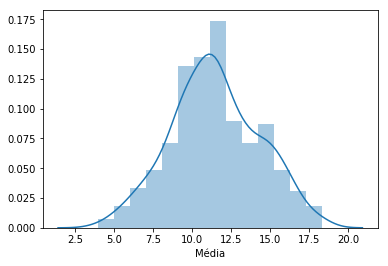

In [253]:
sns.distplot(merge.Média)

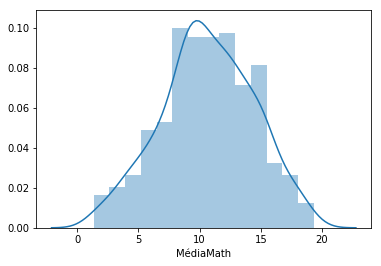

In [254]:
sns.distplot(merge.MédiaMath)

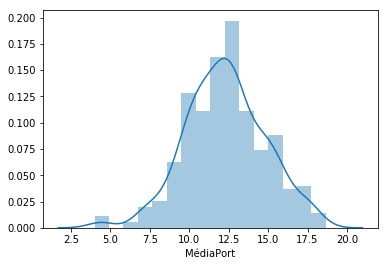

In [255]:
sns.distplot(merge.MédiaPort)

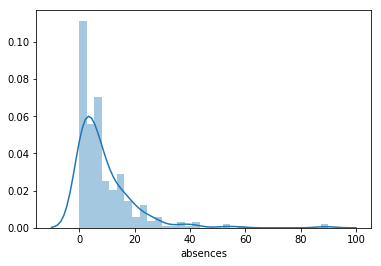

In [256]:
sns.distplot(merge.absences)

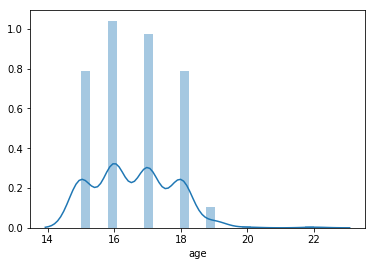

In [257]:
sns.distplot(merge.age)

As Médias parecem estar bem distribuídas seguindo uma Normal, o número de faltas é relativamente baixo, com alguns outliers, e as idades se encontram concentradas no intervalo de 15 à 18 anos.

3) Is there any attribute that can be used to better interpret the dataset? Show this in a graphic where you used this attribute to group (groupby) the data.

# Média das notas por escola e sexo

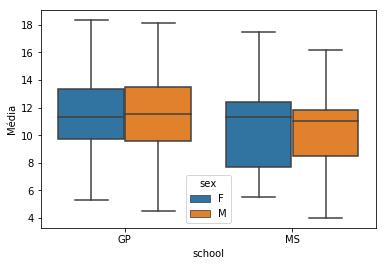

In [258]:
sns.boxplot(x="school", y="Média", hue="sex", data=merge)

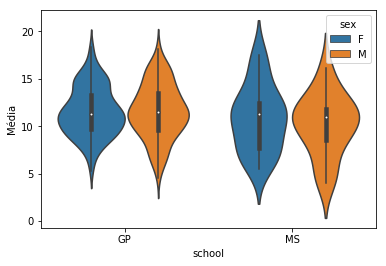

In [259]:
sns.violinplot(x="school", y="Média", hue="sex", data=merge)

GP    342
MS     40
Name: school, dtype: int64

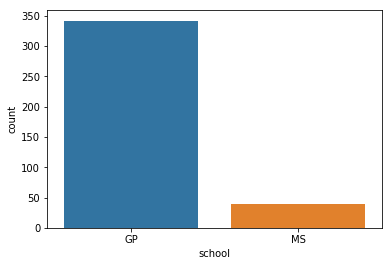

In [260]:
sns.countplot(x="school", data=merge)
merge['school'].value_counts()

É possível observar que as médias da escola Gabriel Pereira são levemente maiores e mais concentradas. Porém isso se deve à discrepância entre a quantidade de dados dessa escola em comparação com a da Mousinho da Silveira (temos 325 dados da Gabriel Pereira e apenas 37 da Mousinho da Silveira). Já comparando entre o sexo dos alunos, não há diferença significativa. 

4) Is there any outlier's pattern? 

2

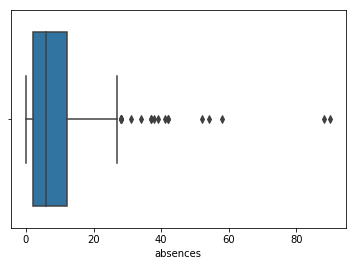

In [332]:
sns.boxplot(merge.absences)
merge[merge['absences'] >= 80].count()[0]

1

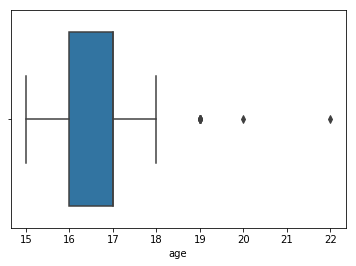

In [330]:
sns.boxplot(merge.age)
merge[merge['age'] == 22].count()[0]

8

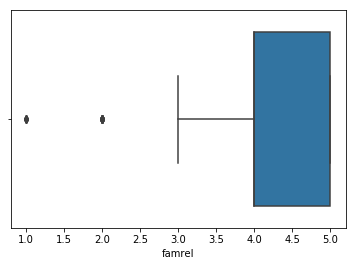

In [331]:
sns.boxplot(merge.famrel)
merge[merge['famrel'] == 1.0].count()[0]

9

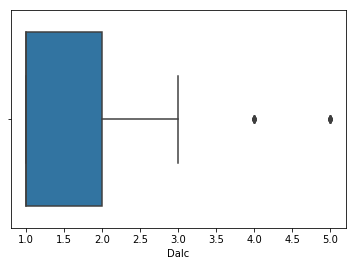

In [333]:
sns.boxplot(merge.Dalc)
merge[merge['Dalc'] == 5.0].count()[0]

In [269]:
merge[merge['Dalc']==5.0]['age']

29     16
61     16
66     15
103    16
224    18
237    17
249    22
322    17
342    18
Name: age, dtype: int64

## Análise de Outliers

Como principais outliers temos: 
* 2 alunos com mais de 80 faltas.
* 1 aluno muito mais velho que os outros, de 22 anos.
* 8 alunos que deram notas 1.0 para o relacionamento com suas famílias.
* 9 alunos que bebem muito mais que os outros (inclui o estudante de 22 anos).

5) Make your own remarks about the dataset. Try to use one or more graphics to justify your remarks.

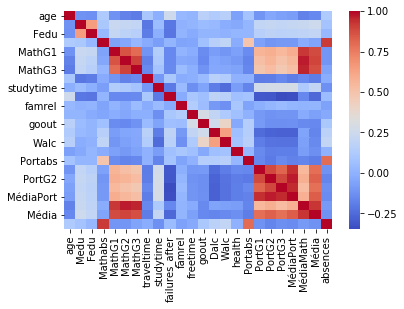

In [270]:
sns.heatmap(merge.corr(), cmap='coolwarm')

# Investigando correlações com as Notas

In [271]:
merge.corr()['Média']

age              -0.151499
Medu              0.249790
Fedu              0.207486
Mathabs          -0.054310
MathG1            0.884070
MathG2            0.898490
MathG3            0.878104
traveltime       -0.186138
studytime         0.210302
failures_after   -0.256969
famrel            0.017113
freetime         -0.066464
goout            -0.152831
Dalc             -0.160699
Walc             -0.147025
health           -0.132647
Portabs          -0.188373
PortG1            0.792506
PortG2            0.829896
PortG3            0.785605
MédiaPort         0.840139
MédiaMath         0.931015
Média             1.000000
absences         -0.122491
Name: Média, dtype: float64

# Tempo de viagem x Média das notas

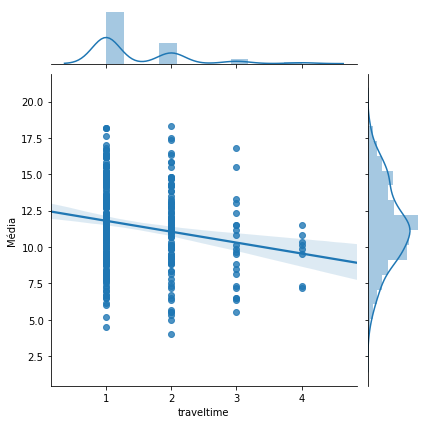

In [272]:
sns.jointplot(merge['traveltime'], merge['Média'], kind='reg')

1    250
2    102
3     22
4      8
Name: traveltime, dtype: int64

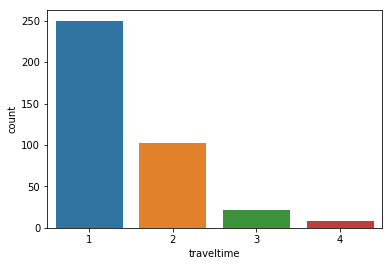

In [273]:
sns.countplot(x="traveltime", data=merge)
merge['traveltime'].value_counts()

Vemos uma pequena correlação de -0.171450, o que mostra que morar mais longe da escola afeta levemente de forma negativa as notas do aluno. Porém, a quantidade de pessoas que tem tempo de viagem com mais de 30 minutos são poucas (cerca de 7,7% do total de amostras). Como a quantidade de amostras não é equilibrada para todos os tempos de viagem, médias extremas podem influenciar nesses resultados.

# Tempo de estudo x Média das notas


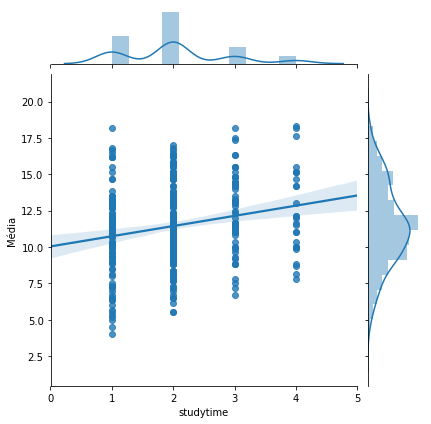

In [274]:
sns.jointplot(merge['studytime'], merge['Média'], kind='reg')

Há uma correlação considerável entre tempo de estudo e a média das notas (0.203042). Como o esperado, estudar mais tempo por semana melhora o desempenho do aluno. 

# Atividades extracurriculares x Média das notas

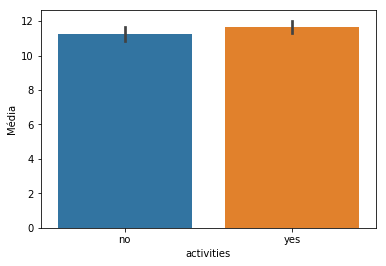

In [275]:
sns.barplot(x="activities", y="Média", data=merge)

In [276]:
merge['activities'].value_counts()

yes    200
no     182
Name: activities, dtype: int64

Há pouca diferença: as notas dos que praticam atividades extracurriculares são um pouco maiores, em média, do que daqueles que não praticam. Porém, há 16 mais amostras dos que fazem atividades, e isso pode influenciar levemente o resultado.

# Desejar educação superior x Média das notas

yes    364
no      18
Name: higher, dtype: int64

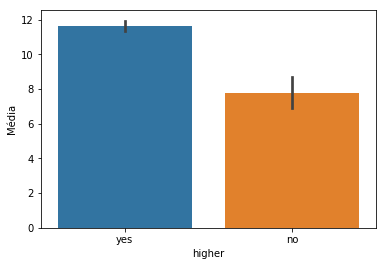

In [277]:
sns.barplot(x="higher", y="Média", data=merge)
merge['higher'].value_counts()

Vemos que há claramente uma divergência no gráfico: os alunos que pretendem ter educação superior tem médias maiores. No entanto, a amostra de pessoas que não querem continuar a vida acadêmica é muito baixa (4,1%), o que torna a média influenciável por medidas extremas. Isso pode ser observado pela grande variância das médias desses alunos.

# Creche x Média das notas

yes    310
no      72
Name: nursery, dtype: int64

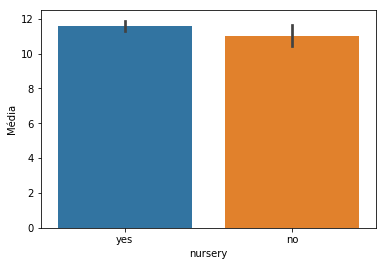

In [278]:
sns.barplot(x="nursery", y="Média", data=merge)
merge['nursery'].value_counts()

Alunos que frequentaram creche tem médias maiores. Porém observa-se o mesmo problema da análise anterior: temos poucas amostras dos que não frequentaram (19%), o que torna a variância maior e a confiabilidade dos dados menor.

# Aulas extras x Nota

no     205
yes    177
Name: paid_math, dtype: int64

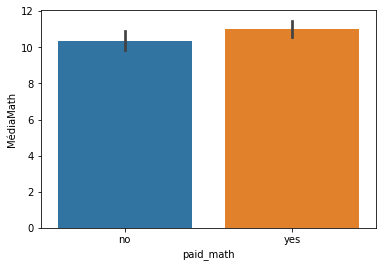

In [279]:
sns.barplot(x="paid_math", y="MédiaMath", data=merge)
merge['paid_math'].value_counts()

no     356
yes     26
Name: paid_port, dtype: int64

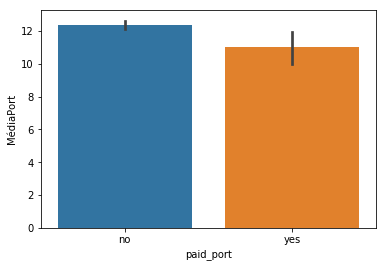

In [280]:
sns.barplot(x="paid_port", y="MédiaPort", data=merge)
merge['paid_port'].value_counts()

No primeiro gráfico vemos que aqueles que fazem aulas extra de matemática vão, de fato, melhor nas provas de matemática, com um resultado confiável pois o número de pessoas que fazem e não fazem as aulas são bem equilibrados (47,2% e 52,8%, respectivamente). 


Já o número de pessoas que fazem aulas extras de português é pequeno (6,3%), portanto há grande variância no resultado. É estranho visualizar no gráfico que os alunos que fazem aulas vão pior nas provas de português. Poderíamos tirar conclusões mais precisas se a amostra fosse maior e equilibrada.

# Educação dos pais x Média das notas

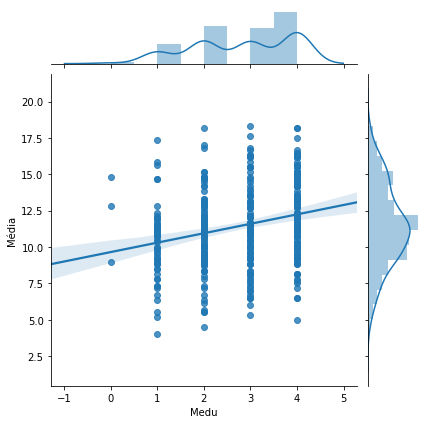

In [281]:
sns.jointplot(merge['Medu'], merge['Média'], kind='reg')

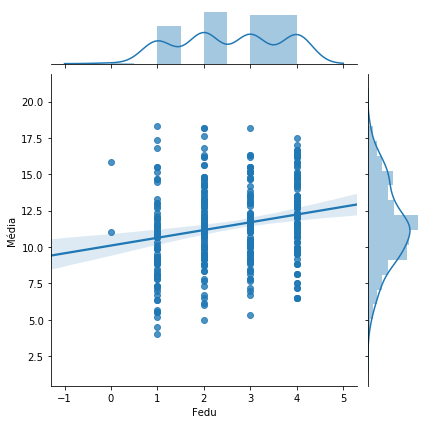

In [282]:
sns.jointplot(merge['Fedu'], merge['Média'], kind='reg')

Há uma relação pequena da educação dos pais e a média das notas: a educação da mãe tem 0.247323 de correlação, enquanto a do pai tem 0.199074, o que significa que o nível de educação dos pais influencia diretamente o desempenho escolar do filho.

# Reprovações x Média das notas

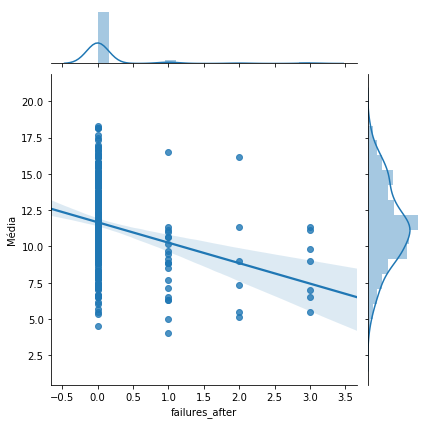

In [283]:
sns.jointplot(merge['failures_after'], merge['Média'], kind='reg')

Há uma grande correlação (de -0.421618) entre o número de reprovações em matérias anteriores com as médias das provas do aluno. Isso mostra que as propriedades são inversamente proporcionais: quanto mais o aluno reprovou, pior é seu desempenho, o que era esperado.

# Local de moradia x Educação dos pais

U    301
R     81
Name: address, dtype: int64

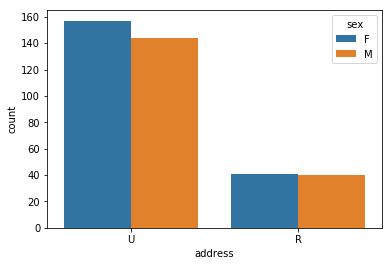

In [284]:
sns.countplot(x="address", hue = 'sex', data=merge)
merge['address'].value_counts()

4    135
2     98
3     95
1     51
0      3
Name: Medu, dtype: int64

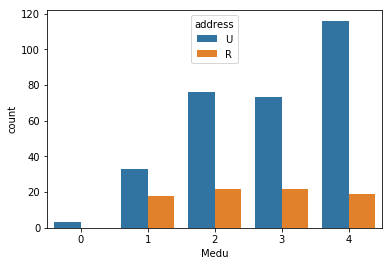

In [285]:
sns.countplot(x="Medu", hue="address", data=merge)
merge['Medu'].value_counts()

In [286]:
merge[(merge.Fedu == 0) & (merge.address == "U")].count()[0]

2

2    105
4     99
3     99
1     77
0      2
Name: Fedu, dtype: int64

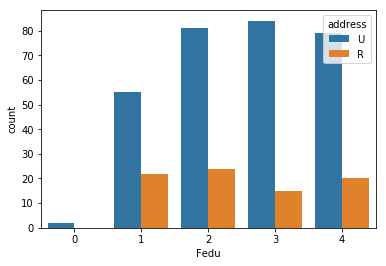

In [287]:
sns.countplot(x="Fedu", hue="address", data=merge)
merge['Fedu'].value_counts()

Há uma diferença grande entre o número de pessoas que vivem em ambiente urbano (78,2%) e rural (21,8%). Ainda assim, percebe-se que as mães de alunos que vivem em região urbana tem majoritamente uma educação melhor que a dos pais da mesma região: aproximadamente 30,4% das mulheres tem educação superior, em comparação com 20,16% dos pais com o mesmo nível. A maior parte dos pais (~44%) tem do 5º ao 9º grau ou até educação secundária. Já no ambiente rural, os pais tem mais educação superior que as mães, mas ao mesmo tempo há mais pais com apenas educação primária.

O dado mais inesperado foram os os outliers de 2 pais e 3 mães sem nenhuma educação, todos no ambiente urbano.

# Responsável

F    198
M    184
Name: sex, dtype: int64

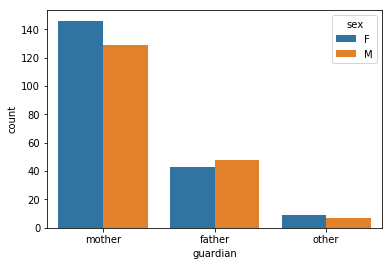

In [288]:
sns.countplot(x="guardian", hue="sex", data=merge)
merge['sex'].value_counts()

In [289]:
merge[merge['guardian'] == "mother"].count()[0]

275

In [290]:
merge[merge['guardian'] == "father"].count()[0]

91

Observamos o esperado: a maior parte dos alunos tem como responsável a mãe (71,8%), em segundo lugar o pai (24,3%). Pouco menos de 4% tem outro responsável.

# Analisando as diferenças entre as notas de Português e Matemática

In [291]:
merge.corr()['MédiaPort']

age              -0.076799
Medu              0.217995
Fedu              0.179736
Mathabs          -0.093054
MathG1            0.595475
MathG2            0.558320
MathG3            0.526431
traveltime       -0.186218
studytime         0.291460
failures_after   -0.335440
famrel            0.021671
freetime         -0.111862
goout            -0.124825
Dalc             -0.276390
Walc             -0.223687
health           -0.182048
Portabs          -0.174251
PortG1            0.941684
PortG2            0.968814
PortG3            0.952412
MédiaPort         1.000000
MédiaMath         0.584226
Média             0.840139
absences         -0.143190
Name: MédiaPort, dtype: float64

In [292]:
merge.corr()['MédiaMath']

age              -0.175018
Medu              0.227083
Fedu              0.189526
Mathabs          -0.018649
MathG1            0.922184
MathG2            0.968764
MathG3            0.959719
traveltime       -0.153219
studytime         0.118556
failures_after   -0.158792
famrel            0.011024
freetime         -0.024179
goout            -0.144694
Dalc             -0.054473
Walc             -0.069478
health           -0.075983
Portabs          -0.164616
PortG1            0.552193
PortG2            0.589884
PortG3            0.534646
MédiaPort         0.584226
MédiaMath         1.000000
Média             0.931015
absences         -0.086934
Name: MédiaMath, dtype: float64

0.29145959412666755

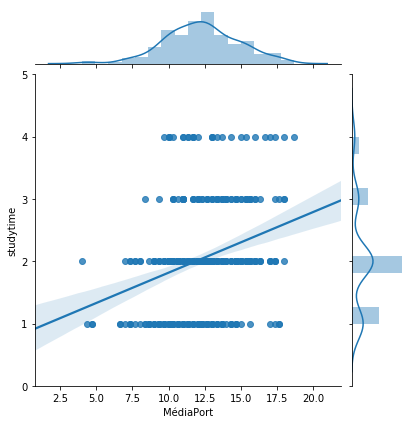

In [293]:
sns.jointplot(merge['MédiaPort'], merge['studytime'], kind='reg')
merge.corr()['MédiaPort']['studytime']

0.1185560514837091

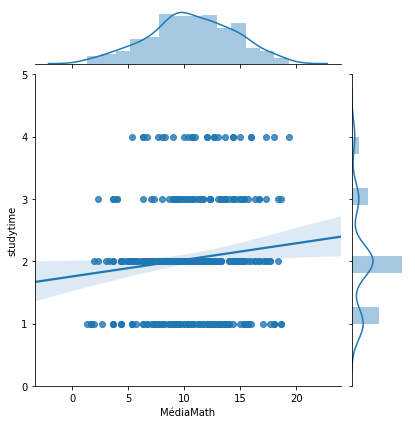

In [294]:
sns.jointplot(merge['MédiaMath'], merge['studytime'], kind='reg')
merge.corr()['MédiaMath']['studytime']

Os gráficos mostram um resultado um tanto inesperado: dentre os estudantes amostrados, o tempo de estudo aparenta influenciar muito mais nas notas de Português (0.27) do que nas notas de Matemática (0.12). Isso pode ser parcialmente explicado pelo fato de as notas de Português serem, em média, maiores que as de Matemática, mas a discrepância não deixa de ser significante.

-0.17501840616566236

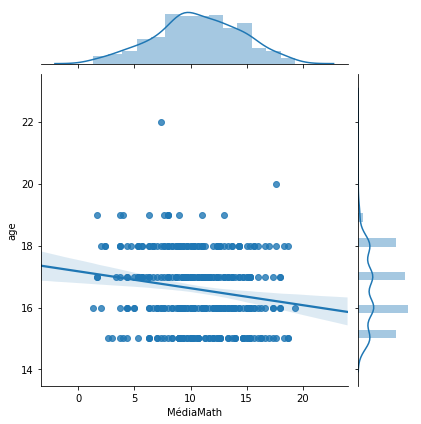

In [295]:
sns.jointplot(merge['MédiaMath'], merge['age'], kind='reg')
merge.corr()['MédiaMath']['age']

-0.07679866073420957

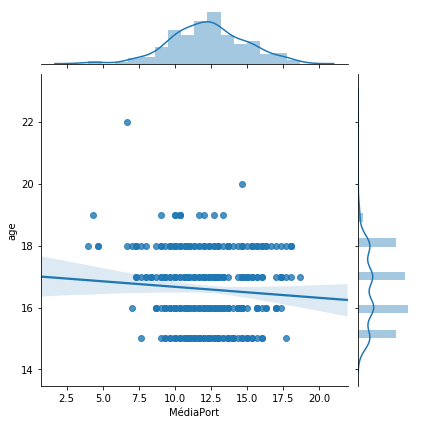

In [296]:
sns.jointplot(merge['MédiaPort'], merge['age'], kind='reg')
merge.corr()['MédiaPort']['age']

In [297]:
merge['age'].value_counts()

16    107
17    100
18     81
15     81
19     11
22      1
20      1
Name: age, dtype: int64

Outro resultado inesperado: dentre os estudantes amostrados, a idade está muito mais relacionada com as médias de Matemática (-0.18) do que com as de Português (-0.068), chamando atenção para o sinal: quanto mais velhos os estudantes são, piores suas notas nessas disciplinas. Cabe aqui porém, considerar a existência de estudantes mais velhos, que são uma amostra pequena do total de entrevistados, mas que acabam influenciando muito os valores com algumas notas extremas, como mostrado abaixo:

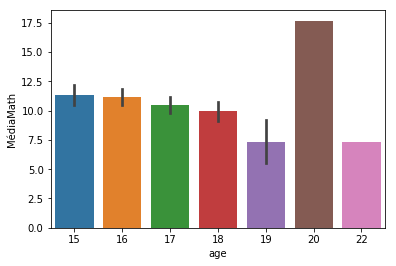

In [298]:
sns.barplot(x='age', y='MédiaMath', data=merge)

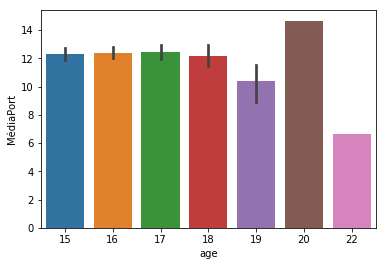

In [299]:
sns.barplot(x='age', y='MédiaPort', data=merge)

# Desempenho escolar e Vida Social

# Reprovações x Número de faltas

0.04887659687145734

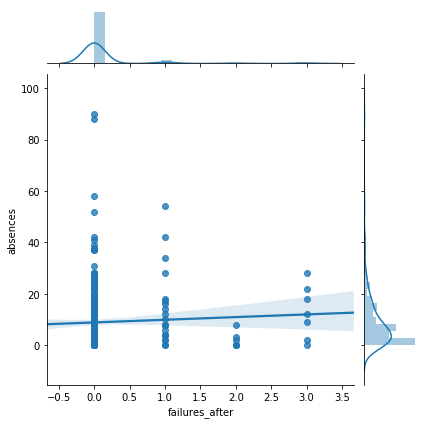

In [300]:
sns.jointplot(merge['failures_after'],merge['absences'], kind='reg')
merge.corr()['absences']['failures_after']

Existe uma correlação muito pequena (0.1)entre o número de reprovações de um aluno e seu número de faltas, o que é um tanto surpreendente: esperava-se que esses valores fossem maiores.

# Tempo de estudo x Tempo livre

-0.1306257481755969

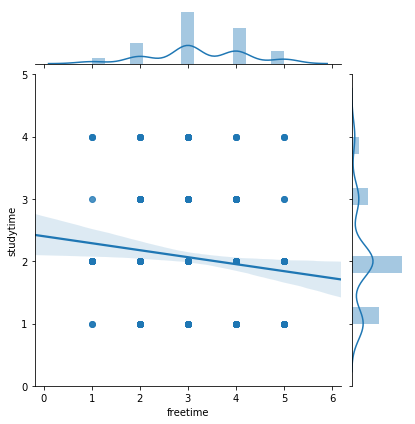

In [301]:
sns.jointplot(merge['freetime'], merge['studytime'], kind='reg')
merge.corr()['freetime']['studytime']

O gráfico mostra algo um tanto óbvio: existe uma pequena correlação negativa (-0.14) entre o tempo que o estudante tem para estudar e seu tempo livre.

# Tempo de estudo x Reprovações

-0.20030377371094116

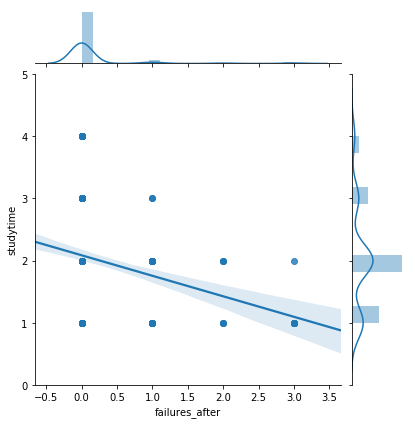

In [302]:
sns.jointplot(merge['failures_after'], merge['studytime'], kind='reg')
merge.corr()['failures_after']['studytime']

Outro resultado dentro do esperado: existe uma significativa (-0.18) correlação negativa entre o tempo de estudo de um estudante e o número de vezes em que ele foi reprovado.

# Tempo livre x Frequência de sair

0.29055649021871

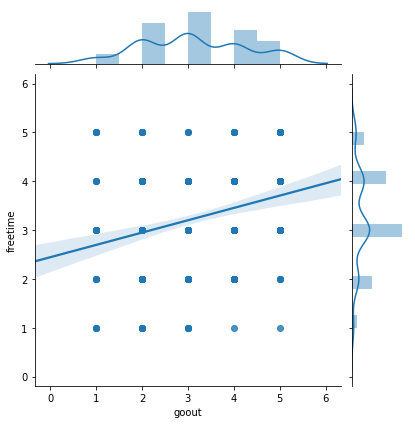

In [303]:
sns.jointplot(merge['goout'], merge['freetime'], kind='reg')
merge.corr()['goout']['freetime']

Mais um resultado dentro das expectativas: o gráfico aponta uma correlação significativa (0.29) entre a frequência que um estudante sai com os amigos e o tempo livre que ele possui.

# Média x Frequência de sair

-0.15283128574052013

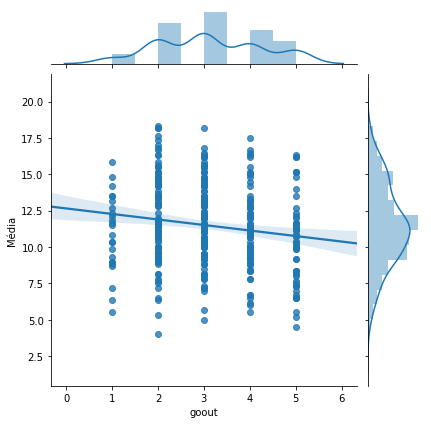

In [304]:
sns.jointplot(merge['goout'], merge['Média'], kind='reg')
merge.corr()['goout']['Média']

Esse gráfico faz sentido com as correlações estabelecidas anteriormente: se maior tempo de estudo implica em menos reprovações, então ele deve estar relacionado a uma nota maior. Porém, maior tempo de estudo implica em menor tempo livre, que implica em sair menos, que implica em notas maiores

no     259
yes    123
Name: romantic, dtype: int64

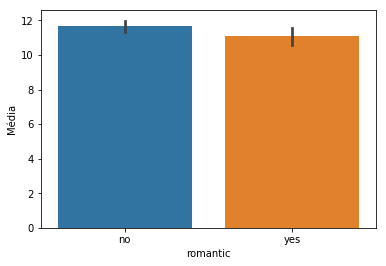

In [305]:
sns.barplot(x='romantic', y='Média', data=merge)
merge['romantic'].value_counts()

O gráfico acima mostra uma diferença pouco significativa nas médias de quem namora e quem não

# Análise da vida social

16    107
17    100
18     81
15     81
19     11
22      1
20      1
Name: age, dtype: int64

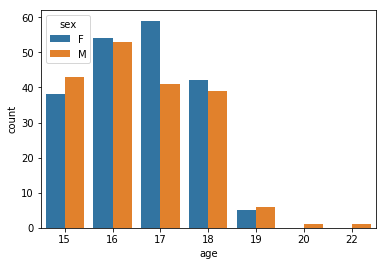

In [306]:
sns.countplot(x="age", hue="sex", data=merge)
merge['age'].value_counts()

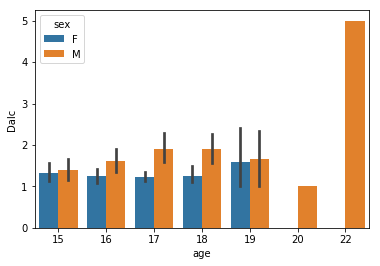

In [307]:
sns.barplot(x="age", y="Dalc", hue = 'sex', data=merge)

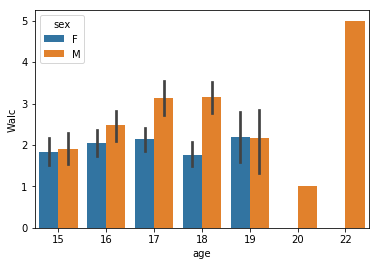

In [308]:
sns.barplot(x="age", y="Walc", hue = 'sex', data=merge2)

Podemos ver que os adolescentes consomem menos álcool de dia de semana, e que em finais de semana os que mais bebem são os alunos de 17 anos (ainda que a maioridade civil em Portugal seja 18 anos). Nos dois casos observa-se que as mulheres bebem bem menos que os homens.

Há um caso a parte de um só aluno de 22 anos que bebe com frequência tanto nos dias de semana quando nos finais de semana, o que influenciou o gráfico mas não representa os alunos de 22 anos de forma geral e, portanto, não pode ser considerado para fins de análise.

no     259
yes    123
Name: romantic, dtype: int64

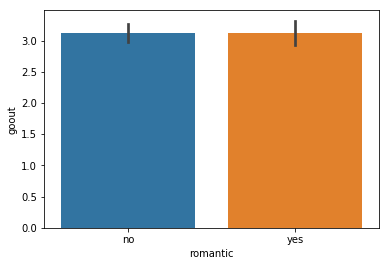

In [309]:
sns.barplot(x="romantic", y="goout", data=merge)
merge['romantic'].value_counts()

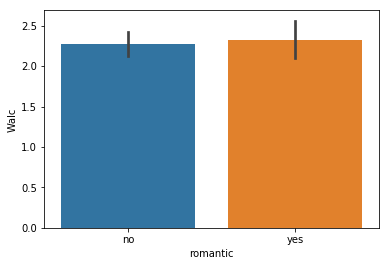

In [310]:
sns.barplot(x="romantic", y="Walc", data=merge)

Vemos que ter um relacionamento amoroso não possui influência com a frequência de sair com os amigos. Porém, nota-se um aumento sutil de consumo alcoólico entre as pessoas que namoram.

16    107
17    100
18     81
15     81
19     11
22      1
20      1
Name: age, dtype: int64

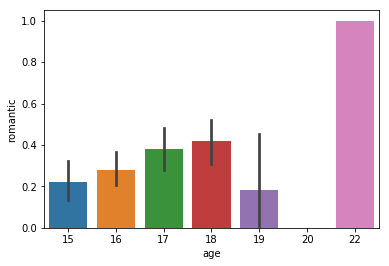

In [311]:
sns.barplot(x="age", y="romantic", data=merge2)
merge2['age'].value_counts()

O gráfico acima aponta uma pequena correlação entre idade e relacionamentos amorosos, isto é, dentre os estudantes amostrados, aqueles que estão em um relacionamento são, em geral, mais velhos.

Vale notar que isso é uma observação válida apenas para o intervalo entre 15 e 18 anos, que possuem uma quantidade de amostras significativas.

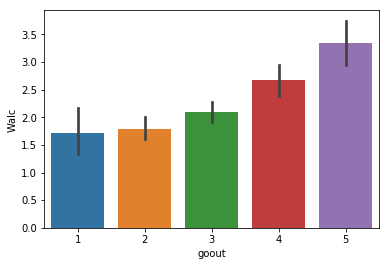

In [312]:
sns.barplot(x="goout", y="Walc", data=merge)

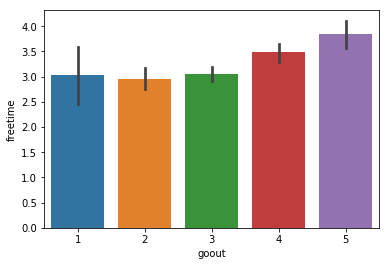

In [313]:
sns.barplot(x="goout", y="freetime", data=merge)

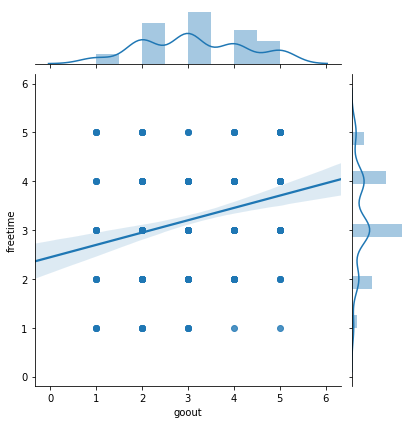

In [314]:
sns.jointplot(merge['goout'], merge['freetime'], kind='reg')

Há uma leve relação diretamente proporcional entre ter tempo livre e frequência de saída com amigos, e uma correlação ainda maior entre sair com amigos e beber.

3    124
2     98
4     81
5     55
1     24
Name: goout, dtype: int64

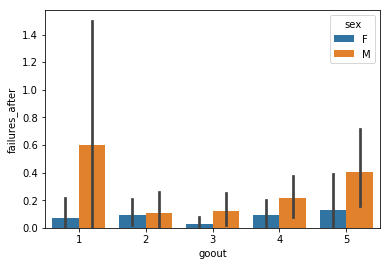

In [315]:
sns.barplot(x="goout", y="failures_after", hue = 'sex', data=merge)
merge['goout'].value_counts()

Neste gráfico temos dados inesperados: o número de reprovações é maior entre as pessoas que saem pouco e as que saem muito. Porém, percebe-se que esses dados estão inversamente proporcionais com a quantidade de cada amostra: as categorias com maiores índices de reprovação são as que possuem menores amostras. Isso pode explicar o resultado desequilibrado, e, assim, deixa de representar a realidade.

# Suporte dos pais e escola

# Obs:
Nesta seção tornamos as propriedades binárias em dados numéricos para poder visualizá-los de forma gráfica ("sim" é 1 e "não" é 0).

GT3    278
LE3    104
Name: famsize, dtype: int64

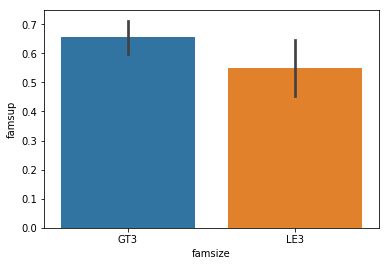

In [316]:
sns.barplot(x="famsize", y="famsup", data=merge2)
merge['famsize'].value_counts()

T    344
A     38
Name: Pstatus, dtype: int64

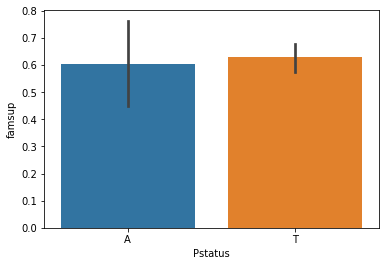

In [317]:
sns.barplot(x="Pstatus", y="famsup", data=merge2)
merge['Pstatus'].value_counts()

No primeiro gráfico tem-se que o suporte familiar costuma ser maior quando a família é maior. No segundo vemos que quando os pais são separados, o suporte familiar tem uma variança muito grande devido à amostra pequena. Mas, em média, o suporte é razoavelmente bom nos dois casos (pais separados e pais juntos).

no     332
yes     50
Name: schoolsup, dtype: int64

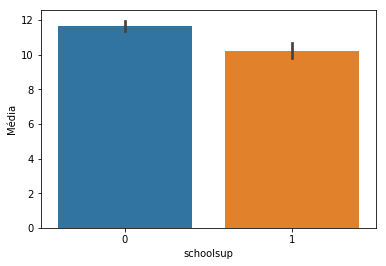

In [318]:
sns.barplot(x="schoolsup", y="Média", data=merge2)
merge['schoolsup'].value_counts()

yes    239
no     143
Name: famsup, dtype: int64

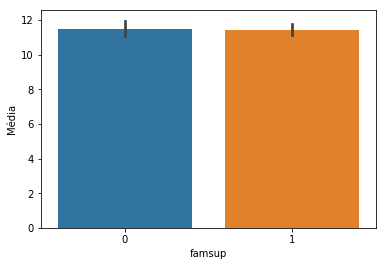

In [319]:
sns.barplot(x="famsup", y="Média", data=merge2)
merge['famsup'].value_counts()

# Relação entre a educação dos pais

4    135
2     98
3     95
1     51
0      3
Name: Medu, dtype: int64

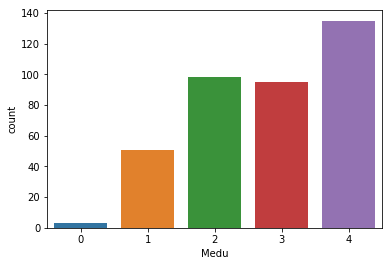

In [320]:
sns.countplot(x='Medu', data=merge)
merge['Medu'].value_counts()

2    105
4     99
3     99
1     77
0      2
Name: Fedu, dtype: int64

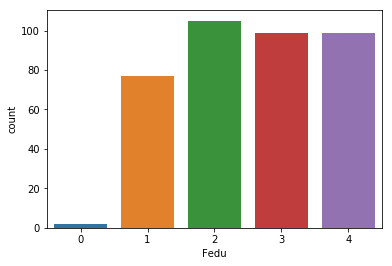

In [321]:
sns.countplot(x='Fedu', data=merge)
merge['Fedu'].value_counts()

0.6497974864423239

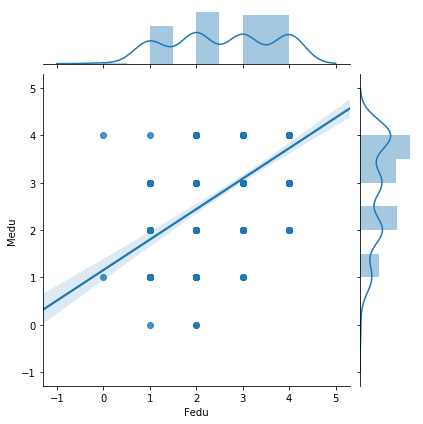

In [322]:
sns.jointplot(merge['Fedu'], merge['Medu'], kind='reg')
merge.corr()['Fedu']['Medu']

Podemos observar uma alta correlação (0.63) entre o nível educacional do pai e da mãe, o que pode ser interpretado como uma maior frequência de relacionamentos entre pessoas com nível de formação similares.

# Internet x Moradia

yes    324
no      58
Name: internet, dtype: int64

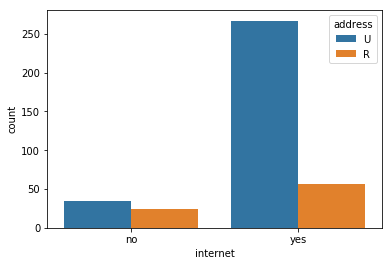

In [261]:
sns.countplot(x="internet", hue="address", data=merge)
merge['internet'].value_counts()

In [262]:
rural = merge2['address'].value_counts()['R']
urbano = merge2['address'].value_counts()['U']
semrural = merge2[(merge2.address == "U") & (merge2.internet == 0)].count()
semurbano = merge2['internet'].value_counts()[0] - semrural

print(semrural[0] / rural)
print(semurbano[0] / urbano)

0.41975308641975306
0.07973421926910298


Ainda que a amostra de estudantes vivendo no espaço rural seja pequena (79), podemos observar que a proporção de estudantes sem acesso à internet é muito maior no espaço rural (39,2%) do que no espaço urbano (0,08%). 

# Tamanho da familia x Moradia

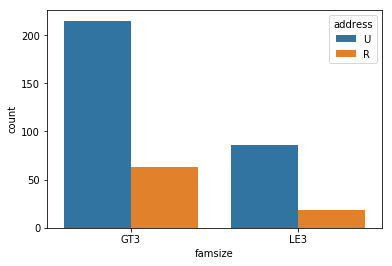

In [263]:
sns.countplot(x="famsize", hue="address", data=merge)

In [264]:
rural = merge['address'].value_counts()['R']
urbano = merge['address'].value_counts()['U']
gt3rural = merge[(merge.address == "R") & (merge.famsize == 'GT3')].count()
gt3urbano = merge['famsize'].value_counts()['GT3'] - gt3rural

print(gt3rural[0] / rural)
print(gt3urbano[0] / urbano)

0.7777777777777778
0.7142857142857143


Já neste caso, a diferença entre a proporção de famílias com mais de 3 filhos no espaço rural e no espaço urbano é pequena demais (77,7% x 71,4%) para sobrepor o problema da pequena amostra de famílias do espaço rural. Não podemos, portanto, tirar conclusões satisfatórias desses dados.

# Relação familiar x Coabitação dos pais

T    344
A     38
Name: Pstatus, dtype: int64

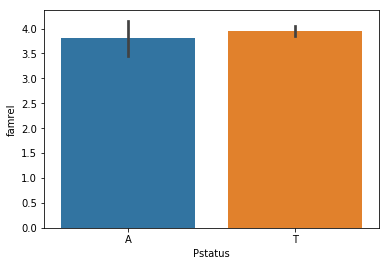

In [323]:
sns.barplot(x="Pstatus", y="famrel", data=merge)
merge['Pstatus'].value_counts()

Olhando o gráfico, não podemos apontar diferenças significativas entre as notas que os estudantes dão para suas relações familiares e o fato de seus pais morarem juntos ou separados. É necessário, porém, observar que a amostra de estudantes cujos pais moram separados é pequena, o que provoca uma alta variância nos dados.

# Trabalho dos pais x Educação dos pais

other       138
services     96
teacher      62
at_home      53
health       33
Name: Mjob, dtype: int64

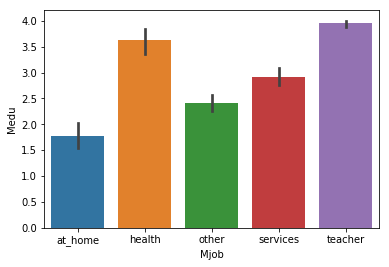

In [324]:
sns.barplot(x="Mjob", y="Medu", data=merge)
merge['Mjob'].value_counts()

other       211
services    107
teacher      31
health       17
at_home      16
Name: Fjob, dtype: int64

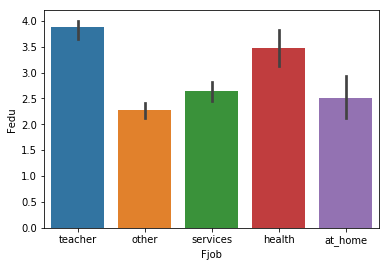

In [325]:
sns.barplot(x="Fjob", y="Fedu", data=merge)
merge['Fjob'].value_counts()

Primeiro, é interessante notar a discrepância entre a distribuição do emprego entre as mães e os pais: as mães estão muito mais uniformemente distribuídas entre os possíveis empregos do que os pais, concentrados nas categorias de "Serviços" e "Outros". De um modo geral, as mães são mais presentes nas áreas de saúde, educação e do lar.

Em segundo lugar, percebemos que os empregos que demandam maior formação educacional estão na área da saúde e da educação.

# Tempo de transporte x Razão

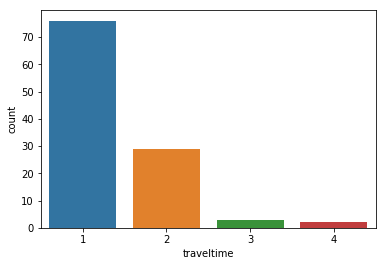

In [326]:
sns.countplot(x='traveltime', data=merge[merge['reason'] == 'home'])

Esse é um gráfico feito apenas para testar a confiabilidade das respostas dos estudantes: ele mostra que, de fato, entre estudantes que escolheram a escola pelo motivo de estar perto de casa, a maioria deles mora a menos de 30 min da escola.

# Análise de Clusters

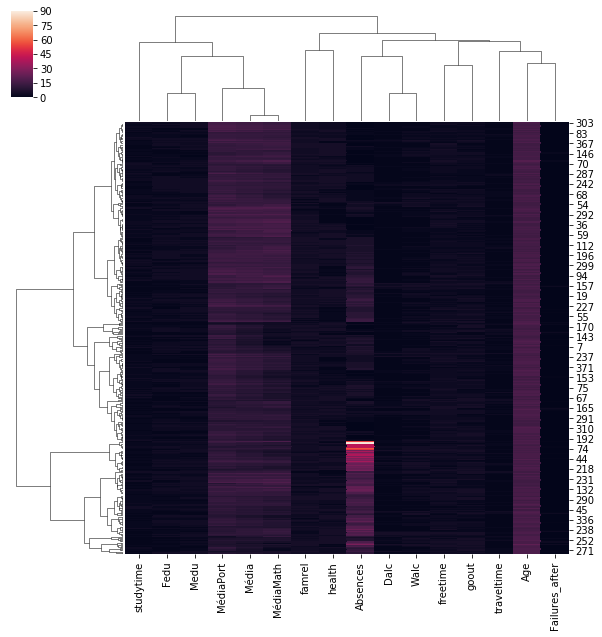

In [327]:
g = sns.clustermap(numeric, method="complete", metric="correlation")

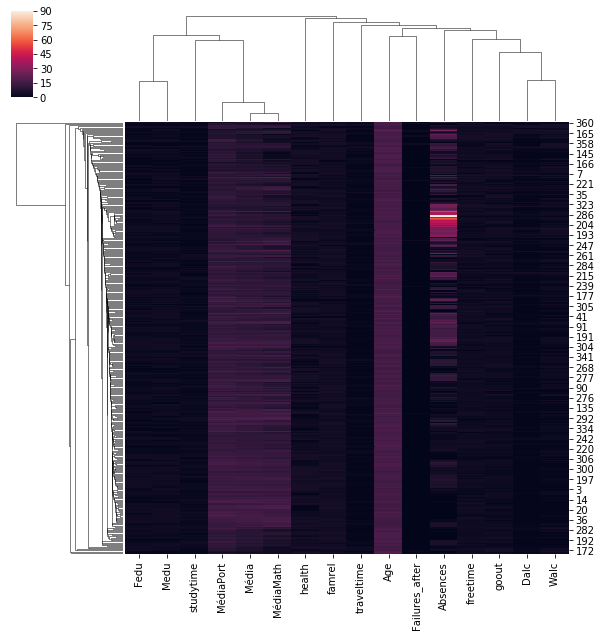

In [328]:
f = sns.clustermap(numeric, method="single",metric="correlation")

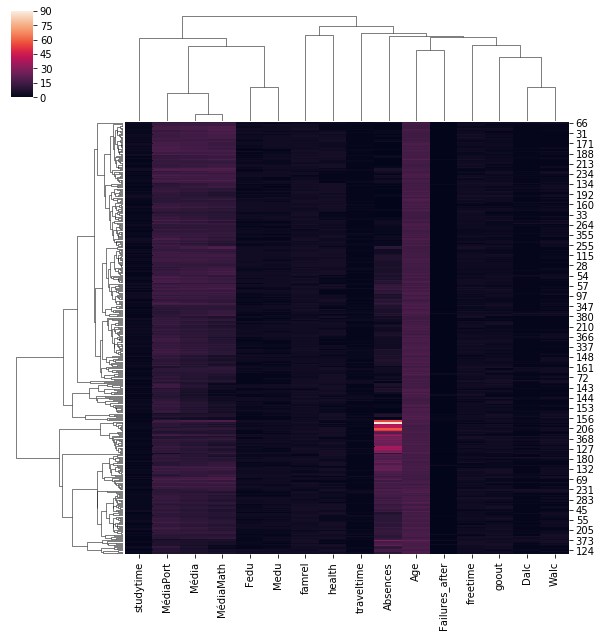

In [329]:
 h = sns.clustermap(numeric, method="average", metric="correlation")

6) Is there any symmetry that can be stressed?

Não percebemos nada do tipo.

7) How important was EDA to help you understand the dataset?

A partir da exploração de dados pudemos verificar visualmente o reflexo de diversas características da vida do aluno em suas notas. 

Através da análise dos clusters (pelo dendrograma superior), pudemos observar o que tínhamos concluído anteriormente: as maiores correlações estão entre a educação dos pais entre si e com as notas do filho, o tempo de estudo com as médias do aluno, e uma leve relação entre sair com os amigos, beber e ter tempo livre.

Sem o questionamento e as visualizações não seria possível tirar conclusões sobre um conjunto de dados dessa proporção.